# Airbnb data exploration

*With the guide from https://www.kaggle.com/davidgasquez/airbnb-recruiting-new-user-bookings/user-data-exploration/notebook*


Import necessary stuffs.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Allow matplot to display via notebook
%matplotlib inline

# Set figure aesthetics
sns.set_style("white", {'ytick.major.size': 10.0})
sns.set_context("poster", font_scale=1.1)

## 1. Loading data
Load data and check basic properties

In [2]:
# Load the data into DataFrames
train_users = pd.read_csv('./data/train_users_2.csv')
test_users = pd.read_csv('./data/test_users.csv')

# Print total user from dataframe.shape[rows,cols]
print("Loaded", train_users.shape[0], "train users and", test_users.shape[0], "users.")

print("====[ Train users have", len(train_users.columns.values.tolist()), "columns ]====\n",\
      train_users.columns.values.tolist(),"\n")

print("====[ Test users have", len(test_users.columns.values.tolist()), "columns ]====\n",\
      test_users.columns.values.tolist(),"\n")

print("Different column is ###", set(train_users.columns.values.tolist()) - set(test_users.columns.values.tolist()), "###")

Loaded 213451 train users and 62096 users.
====[ Train users have 16 columns ]====
 ['id', 'date_account_created', 'timestamp_first_active', 'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow', 'language', 'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked', 'signup_app', 'first_device_type', 'first_browser', 'country_destination'] 

====[ Test users have 15 columns ]====
 ['id', 'date_account_created', 'timestamp_first_active', 'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow', 'language', 'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked', 'signup_app', 'first_device_type', 'first_browser'] 

Different column is ### {'country_destination'} ###


## 2. Merging data
Merge **train_users** and **test_users** into **users**

**But the field 'country_destination' will be 'NaN' for the 'test_users' field.**

In [11]:
# Merge train and test users
users = pd.concat((train_users, test_users), axis=0, ignore_index=True)

# Print total user from dataframe.shape[rows,cols]
print("Merged into", users.shape[0], "users.")

Merged into 275547 users.


### Display users [0-4]

In [12]:
users.head(5)

,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,date_first_booking,first_affiliate_tracked,first_browser,first_device_type,gender,id,language,signup_app,signup_flow,signup_method,timestamp_first_active
0,direct,direct,NaN,NDF,2010-06-28,NaN,untracked,Chrome,Mac Desktop,-unknown-,gxn3p5htnn,en,Web,0,facebook,20090319043255
1,seo,google,38,NDF,2011-05-25,NaN,untracked,Chrome,Mac Desktop,MALE,820tgsjxq7,en,Web,0,facebook,20090523174809
2,direct,direct,56,US,2010-09-28,2010-08-02,untracked,IE,Windows Desktop,FEMALE,4ft3gnwmtx,en,Web,3,basic,20090609231247
3,direct,direct,42,other,2011-12-05,2012-09-08,untracked,Firefox,Mac Desktop,FEMALE,bjjt8pjhuk,en,Web,0,facebook,20091031060129
4,direct,direct,41,US,2010-09-14,2010-02-18,untracked,Chrome,Mac Desktop,-unknown-,87mebub9p4,en,Web,0,basic,20091208061105


### Replace a gender '-unknown-' with NaN

In [32]:
users.gender.replace('-unknown-', np.nan,inplace=True)

In [33]:
users.head(5)

,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,date_first_booking,first_affiliate_tracked,first_browser,first_device_type,gender,id,language,signup_app,signup_flow,signup_method,timestamp_first_active
0,direct,direct,NaN,NDF,2010-06-28,NaN,untracked,Chrome,Mac Desktop,NaN,gxn3p5htnn,en,Web,0,facebook,20090319043255
1,seo,google,38,NDF,2011-05-25,NaN,untracked,Chrome,Mac Desktop,MALE,820tgsjxq7,en,Web,0,facebook,20090523174809
2,direct,direct,56,US,2010-09-28,2010-08-02,untracked,IE,Windows Desktop,FEMALE,4ft3gnwmtx,en,Web,3,basic,20090609231247
3,direct,direct,42,other,2011-12-05,2012-09-08,untracked,Firefox,Mac Desktop,FEMALE,bjjt8pjhuk,en,Web,0,facebook,20091031060129
4,direct,direct,41,US,2010-09-14,2010-02-18,untracked,Chrome,Mac Desktop,NaN,87mebub9p4,en,Web,0,basic,20091208061105


Counting how many percent that we have Nan or null in the data.

**Note**
*country_destination* is known as all Nan from the test_users.

In [37]:
users_nan = (users.isnull().sum() / users.shape[0]) * 100

# This is to calculate the percentage of null/NaN within the data
# .count() tell how much non-null/NaN
# .isnull().sum() tell how much null/NaN
users_nan[users_nan > 0].drop('country_destination')

age                        42.412365
date_first_booking         67.733998
first_affiliate_tracked     2.208335
gender                     46.990169
dtype: float64

## Using dataframe.describe() to see roughly what happen to the data
### age

In [46]:
users.age.describe()

count    158681.000000
mean         47.145310
std         142.629468
min           1.000000
25%          28.000000
50%          33.000000
75%          42.000000
max        2014.000000
Name: age, dtype: float64

So, we see some error in the data.

e.g. **age == 1** and **age == 2014**

So, take a look more with age histogram..

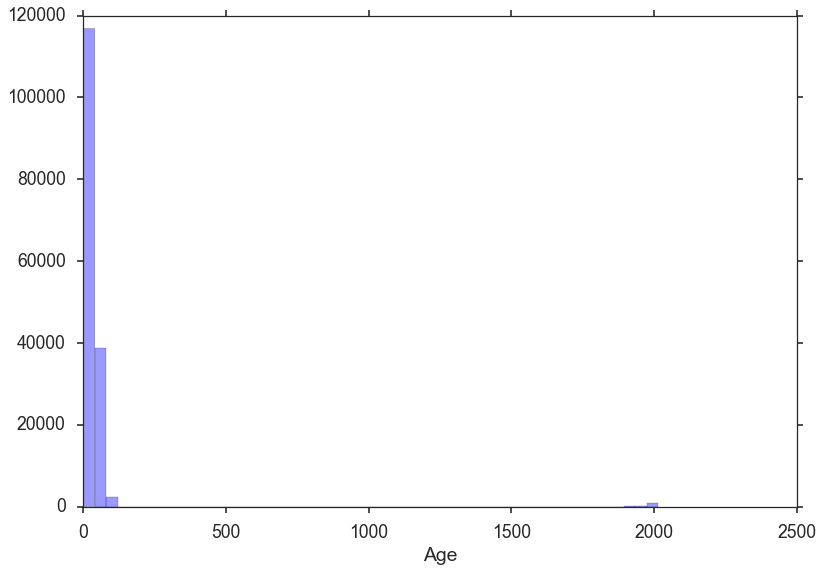

In [68]:
sns.distplot(users.age.dropna(), kde=False, color="b")
plt.xlabel('Age')

### Replacing age noise with NaN
As Airbnb allow 18+ and very old people like 100+ might be fault.